<a href="https://colab.research.google.com/github/jmd290/biosc1540/blob/main/a02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02

**Due**: Jan 25 at 11:59 pm

**Points**: 10

In this assignment, we will explore a [real dataset](https://www.kaggle.com/competitions/lish-moa/overview) involving gene expression data and its change when cells are exposed to different drugs.
This type of data is used to elucidate the drug's mechanism of action (MoA).

You can find the documentation for the relevant pages:

-   [numpy](https://numpy.org/doc/stable/)
-   [pandas](https://pandas.pydata.org/docs/index.html)
-   [matplotlib](https://matplotlib.org/)

## Setup

The following cell is needed to setup your Jupyter Notebook.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

Below, we have a URL stored in `CSV_PATH_FEATURES` that direct to a comma separated value (CSV) file.
Use pandas to load the CSV file located at `CSV_PATH_FEATURES` into a DataFrame, and store the DataFrame in a variable named `df_feat`.

In [ ]:
CSV_PATH_FEATURES = "https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/csv/moa_cancer/train_features.csv"

In [ ]:
df_feat = pd.read_csv(CSV_PATH_FEATURES)

We have the following information in our CSV file: features `g-` signify gene expression data, and `c-` signify cell viability data.
`cp_type` indicates samples treated with a compound (`cp_vehicle`) or with a control perturbation (`ctrl_vehicle`); control perturbations have no MoAs; `cp_time` and `cp_dose` indicate treatment duration (24, 48, 72 hours) and dose (high or low).

## Problem 2

Drop the column `sig_id` from `df_feat` and store the resulting DataFrame in a variable called `df_feat_cleaned`.
Be sure to not overwrite your `df_feat` variable.

In [ ]:
df_feat_cleaned = df_feat.drop(labels=["sig_id"], axis=1)

## Problem 3

Slice `df_feat_cleaned` using a boolean mask where `cp_time` is equal to `24` and store it in a new variable called `df_feat_sliced`.

In [ ]:
mask = df_feat_cleaned["cp_time"] == 24
df_feat_sliced = df_feat_cleaned[mask]

## Problem 4

Using `df_feat_sliced`, create a variable named `cp_type_list` and assign it a list containing each unique value of `cp_type`.
Hint: The length of your `cp_type_list` should be equal to `2`.

In [ ]:
cp_type_list = df_feat_sliced["cp_type"].unique()

## Problem 5

Using `df_feat_sliced`, store the data under column `g-0` in a NumPy array called `g_0_expression` and `g-1` in `g_1_expression`.

In [ ]:
g_0_expression = df_feat_sliced['g-0'].to_numpy()
g_1_expression = df_feat_sliced['g-1'].to_numpy()

## Problem 6

Create a dictionary named `g_stats` with keys `g-0` and `g-1`.
Set the values for these keys to be empty dictionaries `{}`.

In [ ]:
g_stats = dict.fromkeys('g-0', 'g-1')

Now, compute the following statistics and store them under their respective key.

-   `mean` the mean
-   `std`: standard deviation

For example, compute the mean of `g_0_expression` and store it in `g-0`.

In [ ]:
g_stats['g-0'] = (g_0_expression.mean, g_0_expression.std)
g_stats['g-1'] = (g_1_expression.mean, g_1_expression.std)

## Problem 7

Create a scatter plot with `g_0_expression` on the x-axis and `g_1_expression` on the y-axis.

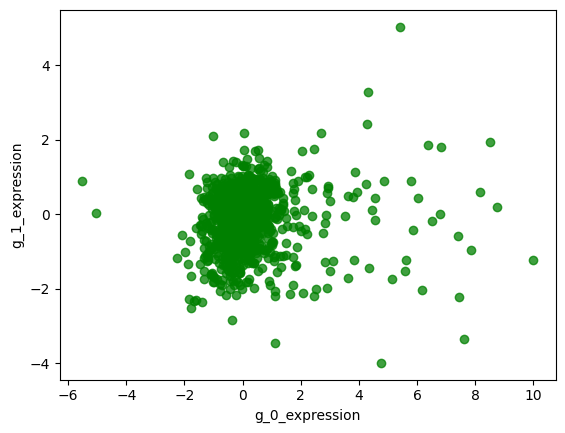

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1)
label_1 = "g_0_expression"
label_2 = "g_1_expression"
plt.scatter(
    g_0_expression,
    g_1_expression,
    alpha=0.75,
    color = 'green',
)
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.show()